In [1]:
import argparse
from pathlib import Path
from time import sleep
from IPython.display import clear_output

import numpy as np
from keras.models import load_model

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from gand.data import data

# Utils

In [2]:
DATASET_INFO = {
    'mnist': {
        'class_names': [str(i) for i in range(10)],
        'input_shape': (28, 28, 1)
    },
    'fashion_mnist': {
        'class_names': ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 
                        'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'],
        'input_shape': (28, 28, 1)
    },
    'cifar10':{
        'class_names': ['airplane', 'car', 'bird', 'cat', 'deer', 
                        'dog', 'frog', 'horse', 'ship', 'truck'],
        'input_shape': (32, 32, 3)
    }
}

In [32]:
gan_name = 'cgan'

cwd = Path.cwd()

max = 0
for i in DATASET_INFO.keys():
    total = len(list(cwd.glob(f'**/notebooks/models/{gan_name}/{i}/*.h5')))
    DATASET_INFO[i]['total'] = total
    if total > max:
        max = total

num_frames = max
interval = 1
fps = 60
fontsize = 20

num_frames, interval, fps

(553, 1, 60)

# Figure

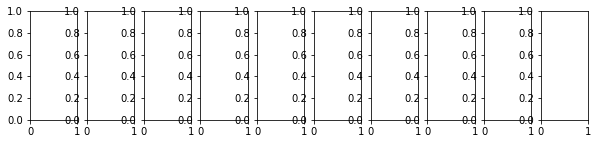

In [33]:
fig, axs = plt.subplots(1, 10, figsize=(10, 2))

def update(frame):
    print(f'[{frame}/{num_frames}]')
    g_model = load_model(f'./notebooks/models/{gan_name}/{dataset_name}/gen_model_e-{frame+1:03d}.h5')
    X, y = data.generate_fake_data(n=1, g_model=g_model)
    X = (X+1) / 2
    for i, ax in enumerate(axs.flatten()):
        ax.imshow(X[i], cmap='gray_r')
        ax.set_title(DATASET_INFO[dataset_name]['class_names'][y[i]])
        ax.axis('off')
    fig.suptitle(f'({dataset_name.upper()}) Epoch: {frame+1}', fontsize=20)
    plt.tight_layout()
    clear_output(wait=True)

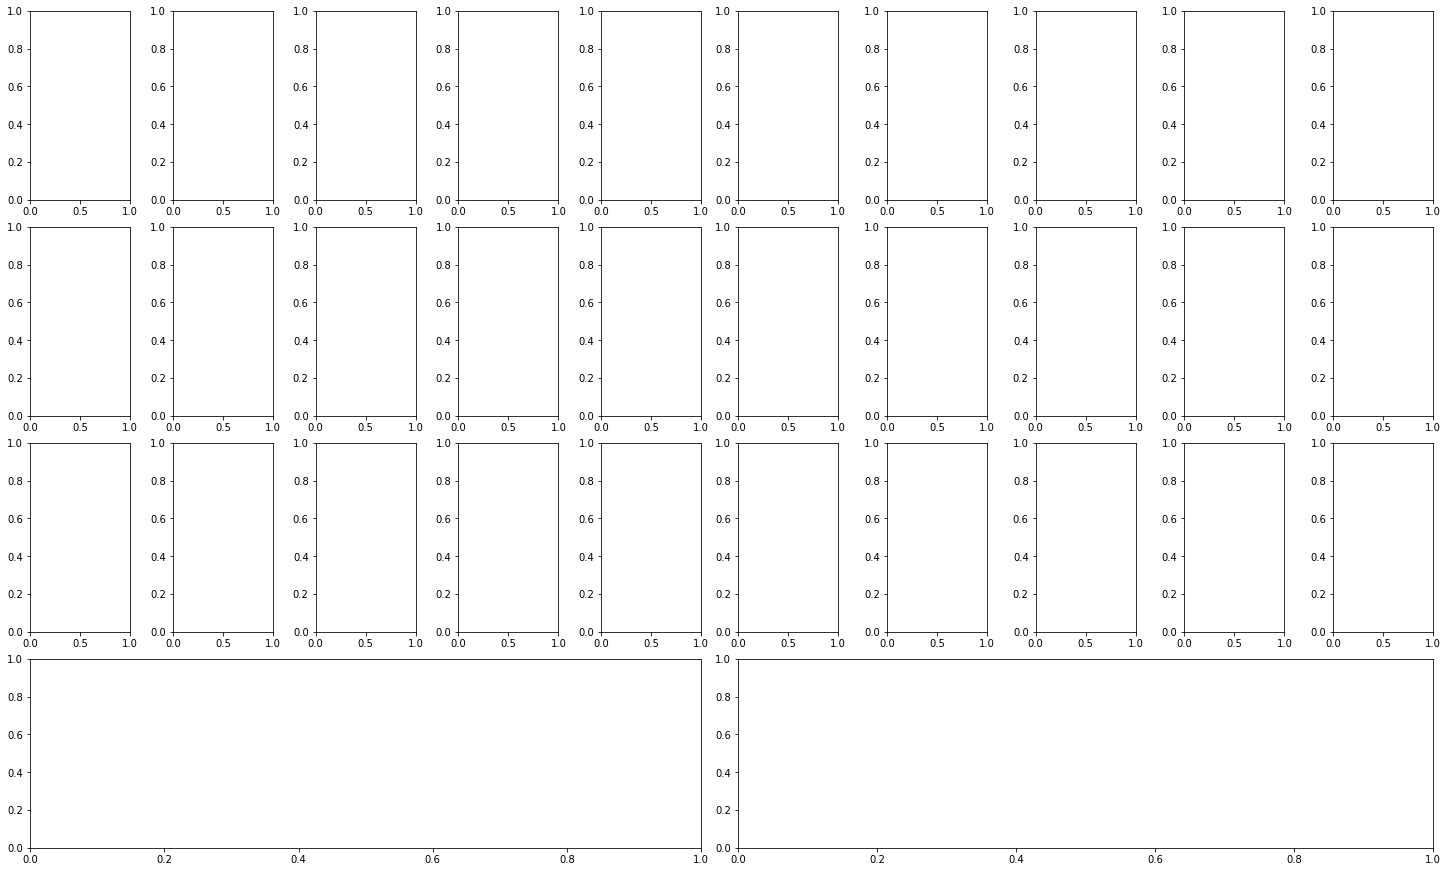

In [34]:
fig, axd = plt.subplot_mosaic([[f'mnist-{i}' for i in range(10)], [f'fashion_mnist-{i}' for i in range(10)], 
                               [f'cifar10-{i}' for i in range(10)],                               
                               sorted([i for i in ['noise', 'hist']*5])], figsize=(20, 12), constrained_layout=True)

def update(frame):
    print(f'[{frame}/{num_frames-1}]')
    
    np.random.seed(42)
    latent_dim, n_samples = 100, 10
    noise = np.random.randn(latent_dim * n_samples)

    for dataset_name in DATASET_INFO.keys():        
        epoch = np.clip(frame, 0, DATASET_INFO[dataset_name]['total']) + 1
        g_model = load_model(f'./notebooks/models/{gan_name}/{dataset_name}/gen_model_e-{epoch:03d}.h5')
        X, y = data.generate_fake_data(n=1, g_model=g_model, verbose=0)
        X = (X + 1) / 2
        
        for i in range(10):
            axd[f'{dataset_name}-{i}'].cla()
            axd[f'{dataset_name}-{i}'].imshow(X[i], cmap='gray_r')
            axd[f'{dataset_name}-{i}'].set_title(DATASET_INFO[dataset_name]['class_names'][y[i]], 
                                                 fontsize=fontsize+2)
            axd[f'{dataset_name}-{i}'].axis('off')
        i = 0
        axd[f'{dataset_name}-{i}'].text(-0.5, 0.5, f'E: {epoch}', fontsize=fontsize+5,
                                        va='center', ha='center', 
                                        transform=axd[f'{dataset_name}-{i}'].transAxes)
    axd['noise'].plot(noise, color='C1')
    axd['hist'].hist(noise, bins=100, color='C1')
    clear_output(wait=True)

In [ ]:
anim = animation.FuncAnimation(fig, update, frames=num_frames, interval=interval)

filename = f"animation.gif"

# folder = cwd / Path('reports/animations') / Path(f'{gan_name}/{dataset_name}')
folder = cwd / Path('reports/animations') / Path(f'{gan_name}')

folder.mkdir(parents=True, exist_ok=True)

writer = animation.FFMpegWriter(fps=fps)
print(folder.joinpath(filename))
anim.save(folder.joinpath(filename), writer=writer)

[122/552]
